In [22]:
import tensorflow
print('imported')

imported


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [28]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
len(X_train)

60000

In [30]:
len(X_test)

10000

In [31]:
X_train[0].shape

(28, 28)

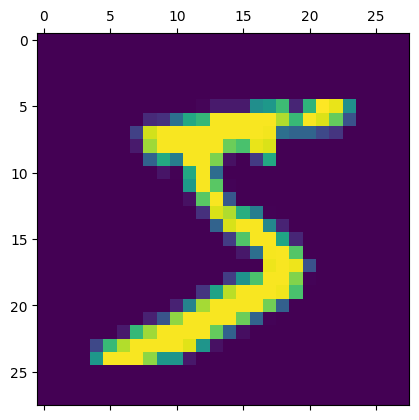

In [34]:
plt.matshow(X_train[0])

In [33]:
y_train[0]

5

In [35]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [37]:
X_train_flattened.shape

(60000, 784)

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2808 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1257 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9842


In [39]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9730


[0.08233698457479477, 0.9729999899864197]

In [40]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [41]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [46]:
model = keras.Sequential([
    layers.Conv2D(30,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1675 - accuracy: 0.9509
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0544 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0363 - accuracy: 0.9885
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0249 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0166 - accuracy: 0.9946


In [47]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0504 - accuracy: 0.9851


[0.05044301599264145, 0.9850999712944031]

In [50]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [51]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [52]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[6.6615071e-04, 3.4753155e-02, 3.5841298e-01, ..., 9.9999976e-01,
        2.5146513e-03, 5.5843109e-01],
       [4.3846238e-03, 6.2300783e-01, 1.0000000e+00, ..., 3.5492354e-07,
        2.4779950e-04, 2.3260033e-04],
       [6.4143641e-03, 9.9997807e-01, 7.9033405e-02, ..., 1.7567618e-01,
        6.5150475e-03, 2.0262655e-03],
       ...,
       [3.8706294e-05, 1.6012967e-04, 1.1546782e-03, ..., 5.2947059e-02,
        7.6570570e-01, 9.8253804e-01],
       [1.3567292e-03, 2.9478451e-06, 8.5083529e-06, ..., 7.3094939e-06,
        9.9853879e-01, 5.7621691e-03],
       [7.1033193e-03, 8.1640977e-04, 7.3128097e-02, ..., 4.9627454e-07,
        4.0271208e-03, 6.8366717e-06]], dtype=float32)

In [54]:
y_pred1= [np.argmax(element) for element in y_pred]
y_pred1[:5]

[7, 2, 1, 0, 4]

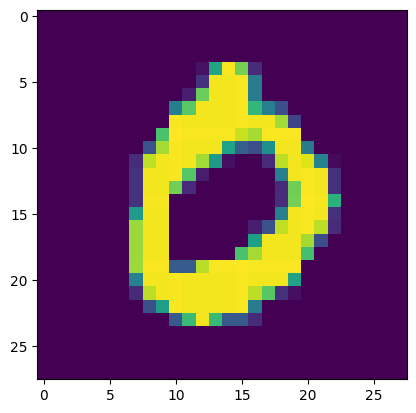

In [59]:
plt.imshow(X_test[3])

In [179]:
import pandas as pd

In [180]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
df.drop(['RowNumber','CustomerId','Surname'], axis= 'columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [182]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [183]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [184]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [185]:
df1 = pd.get_dummies(data=df, columns=['Geography', 'Gender'])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [186]:
print_unique_col_values(df1)

In [187]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [189]:
col_to_scale=['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

In [190]:
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [191]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,True,False


In [192]:
X = df1.drop('Exited',axis='columns')
y = df1.Exited

In [193]:
X_train.shape

(60000, 28, 28)

In [194]:
X_test.shape

(10000, 28, 28)

In [195]:
from sklearn.metrics import confusion_matrix, classification_report

In [196]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [197]:
def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(13, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(X_train, y_train, epochs=5)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [198]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: -48.2378 - accuracy: 0.1124
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: -52.6704 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: -52.6704 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: -52.6704 - accuracy: 0.1124
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: -52.5092 - accuracy: 0.1135
[-52.50920486450195, 0.11349999904632568]
313/313 [==============================] - 1s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and unknown targets

In [ ]:
# Class count
count_class_0, count_class_1 = df1.Exited.value_counts()

# Divide by class
df_class_0 = df1[df1['Exited'] == 0]
df_class_1 = df1[df1['Exited'] == 1]

In [ ]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

In [ ]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

In [ ]:
X_test = np.asarray(X_test)
X_train = np.asarray(X_train)
y_test = np.asarray(y_test)
y_train = np.asarray(y_train)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')